In [1]:
import sys
from pathlib import Path
if "../src" not in sys.path:
    sys.path.append("../src")

import matplotlib.pyplot as plt
import dietcoke
import random

from dietcoke import corpus_lst, Growth, Author
from collections import defaultdict
import numpy as np

import warnings
warnings.filterwarnings('ignore')

random.seed(2021)

# shuffle
# zscore with a lot of 1s

In [2]:
diachronic_texts = ''
# diachronic_texts_shuffled = ''
for corpus in corpus_lst():
    print(corpus.dynaspan)

    corpus.read_corpus()
    or_corpus = sorted(corpus.corpus, key=lambda x: Author(x.author).rep_year, reverse=True)
    for line in or_corpus:
        try:
            diachronic_texts += ''.join(line.text)
            # line_shuffled = line.text
            # random.shuffle(line.text)
            # diachronic_texts_shuffled += ''.join(line_shuffled)
        except:
            print(line)

    growth_obj = Growth(diachronic_texts, 10000)

    print(growth_obj.N)
    break

100%|██████████| 8/8 [00:00<00:00, 4034.44it/s]


先秦
6189515


In [3]:
# len(diachronic_texts_shuffled)

In [4]:
# diachronic_texts_shuffled[:100]

In [5]:
print(growth_obj.calc_char_freq_by_text_slice('秦', return_df=False)[:10])

[(0, 4.430816798843313), (1, 2.9444389791664403), (2, 2.3978952727983707), (3, 2.3978952727983707), (4, 2.8903717578961645), (5, 2.833213344056216), (6, 2.5649493574615367), (7, 2.4849066497880004), (8, 2.0794415416798357), (9, 2.302585092994046)]


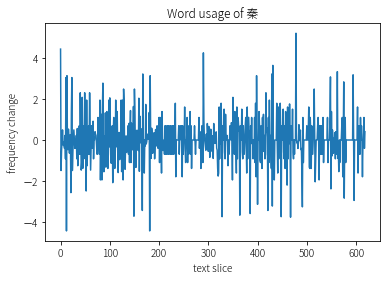

In [6]:
growth_obj.plot_char_freq_by_text_slice('秦')

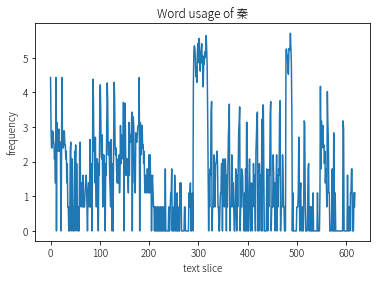

In [7]:
growth_obj.plot_char_freq_by_text_slice('秦', show_change=False)

In [8]:
expected_V = growth_obj.get_expected_V
expected_V[:10]

[1821.2107695548184,
 2459.493477948299,
 2885.921323244016,
 3210.4439260563486,
 3473.657055823519,
 3695.675333346916,
 3888.04588894264,
 4058.02987556638,
 4210.493157897944,
 4348.855870104814]

In [9]:
chunked_V = growth_obj.get_chunked_V
chunked_V[:10]

[1127, 1519, 1747, 1919, 2143, 2283, 2442, 2556, 2624, 2720]

In [10]:
# xs, ys, Vset = growth_obj.calc_chunked_V(diachronic_texts_shuffled)
# ys[:10]

In [11]:
# growth_obj.get_vgc()
# growth_obj.vgc_df['random_chunked_V'] = ys
# growth_obj.vgc_df['random_V_diff'] = growth_obj.vgc_df['expected_V'] - growth_obj.vgc_df['random_chunked_V']
# growth_obj.get_vgc()

In [12]:
# diachronic_texts_shuffled2 = list(growth_obj.text)
# random.shuffle(diachronic_texts_shuffled2)
# diachronic_texts_shuffled2 = ''.join(diachronic_texts_shuffled2)

# _, ys_2, _ = growth_obj.calc_chunked_V(diachronic_texts_shuffled2)
# ys_2[:10]

In [13]:
# growth_obj.vgc_df['random2_chunked_V'] = ys_2
# growth_obj.vgc_df['random2_V_diff'] = growth_obj.vgc_df['expected_V'] - growth_obj.vgc_df['random2_chunked_V']
# growth_obj.get_vgc()

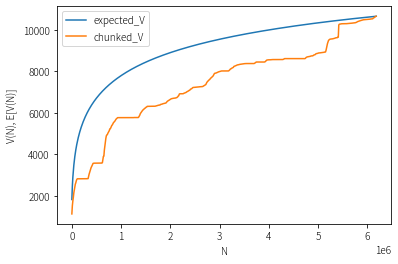

In [14]:
growth_obj.plot_vgc_curve(growth_obj.get_vgc())

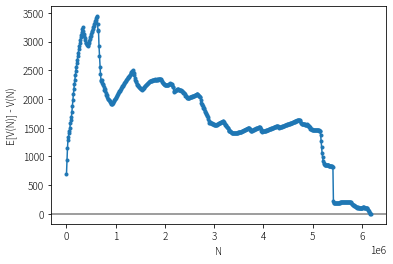

In [15]:
# vgc_df = growth_obj.vgc_df
growth_obj.plot_vgc_residuals(growth_obj.get_vgc())

# plt.plot(vgc_df['N'], vgc_df['random_V_diff'], linestyle='dotted', marker='o', markersize=2.5)
# plt.plot(vgc_df['N'], vgc_df['random2_V_diff'], linestyle='dotted', marker='o', markersize=2.5)

In [16]:
min_val, prog_err_scores_df = growth_obj.get_prog_err_scores_df()
prog_err_scores_df

,N,expected_V,chunked_V,V_diff,chunked_V_prev,expected_V_prev,prog_err_score,prog_err_score_log
0,0,1821.210770,1127,694.210770,0,0.000000,694.210770,7.154959
1,10000,2459.493478,1519,940.493478,1127,1821.210770,246.282708,6.724448
2,20000,2885.921323,1747,1138.921323,1519,2459.493478,198.427845,6.665247
3,30000,3210.443926,1919,1291.443926,1747,2885.921323,152.522603,6.604963
4,40000,3473.657056,2143,1330.657056,1919,3210.443926,39.213130,6.438460
...,...,...,...,...,...,...,...,...
614,6140000,10638.573027,10585,53.573027,10569,10636.175939,-13.602912,6.350234
615,6150000,10640.965490,10601,39.965490,10585,10638.573027,-13.607537,6.350226
616,6160000,10643.353341,10626,17.353341,10601,10640.965490,-22.612149,6.334376
617,6170000,10645.736593,10641,4.736593,10626,10643.353341,-12.616748,6.351955


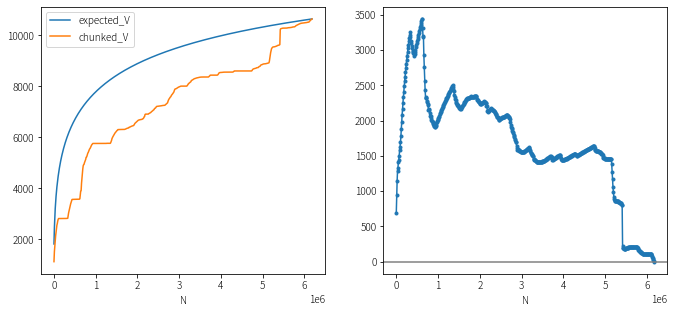

In [17]:
growth_obj.plot_vgc(growth_obj.get_vgc())

In [18]:
growth_obj.get_prog_err_scores_df()[1]

,N,expected_V,chunked_V,V_diff,chunked_V_prev,expected_V_prev,prog_err_score,prog_err_score_log
0,0,1821.210770,1127,694.210770,0,0.000000,694.210770,7.154959
1,10000,2459.493478,1519,940.493478,1127,1821.210770,246.282708,6.724448
2,20000,2885.921323,1747,1138.921323,1519,2459.493478,198.427845,6.665247
3,30000,3210.443926,1919,1291.443926,1747,2885.921323,152.522603,6.604963
4,40000,3473.657056,2143,1330.657056,1919,3210.443926,39.213130,6.438460
...,...,...,...,...,...,...,...,...
614,6140000,10638.573027,10585,53.573027,10569,10636.175939,-13.602912,6.350234
615,6150000,10640.965490,10601,39.965490,10585,10638.573027,-13.607537,6.350226
616,6160000,10643.353341,10626,17.353341,10601,10640.965490,-22.612149,6.334376
617,6170000,10645.736593,10641,4.736593,10626,10643.353341,-12.616748,6.351955


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  font

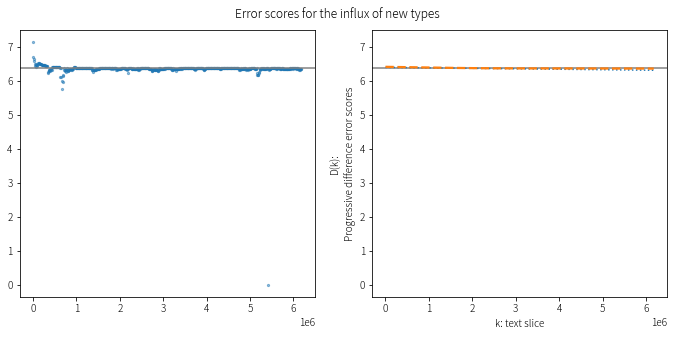

In [19]:
growth_obj.plot_prog_err_scores(*growth_obj.get_prog_err_scores_df())

In [20]:
print('Underdispersed:', len(growth_obj.get_underdisperse_chars), growth_obj.get_underdisperse_chars)
print('Overdispersed:', len(growth_obj.get_overdisperse_chars), growth_obj.get_overdisperse_chars)

619it [00:01, 583.91it/s]


Underdispersed: 566 ['子', '一', '非', '者', '之', '諸', '公', '也', '喜', '刑', '名', '法', '術', '學', '而', '歸', '其', '本', '於', '老', '為', '人', '口', '不', '能', '道', '說', '善', '著', '書', '與', '俱', '事', '卿', '自', '以', '如', '見', '弱', '數', '干', '王', '用', '是', '病', '治', '國', '務', '求', '任', '賢', '反', '舉', '加', '功', '實', '上', '文', '亂', '武', '犯', '禁', '則', '急', '士', '所', '養', '直', '容', '邪', '臣', '觀', '得', '失', '變', '故', '作', '五', '內', '外', '難', '十', '餘', '萬', '言', '或', '傳', '至', '秦', '曰', '乎', '寡', '此', '死', '矣', '因', '攻', '始', '及', '乃', '使', '未', '害', '今', '欲', '侯', '終', '情', '久', '遺', '患', '過', '誅', '然', '下', '令', '殺', '陳', '後', '已', '卷', '第', '聞', '知', '智', '忠', '當', '亦', '雖', '願', '唯', '大', '罪', '天', '陽', '北', '南', '固', '齊', '收', '成', '從', '將', '西', '強', '世', '有', '三', '亡', '謂', '正', '虛', '民', '張', '軍', '百', '首', '斷', '前', '千', '皆', '白', '在', '走', '賞', '罰', '行', '信', '出', '號', '無', '相', '父', '母', '中', '生', '嘗', '耳', '戰', '足', '徒', '夫', '同', '貴', '可', '對', '地', '長', '方', '里', '師', '形', '利', '莫', '若', '兼',

In [21]:
growth_obj.get_VU[:5]

array([363, 354, 370, 362, 376])

In [22]:
growth_obj.get_NU[:5]

array([2753, 2590, 1993, 2137, 2733])

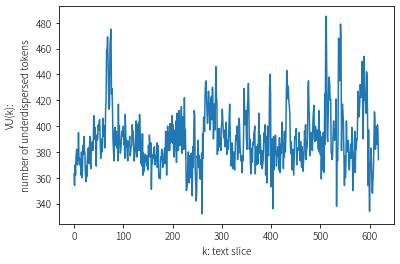

In [23]:
growth_obj.plot_VU()

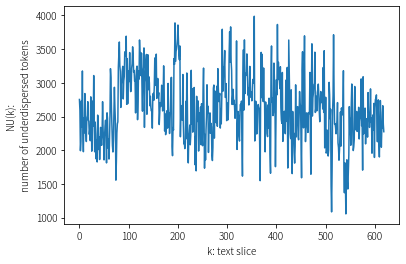

In [24]:
growth_obj.plot_NU()

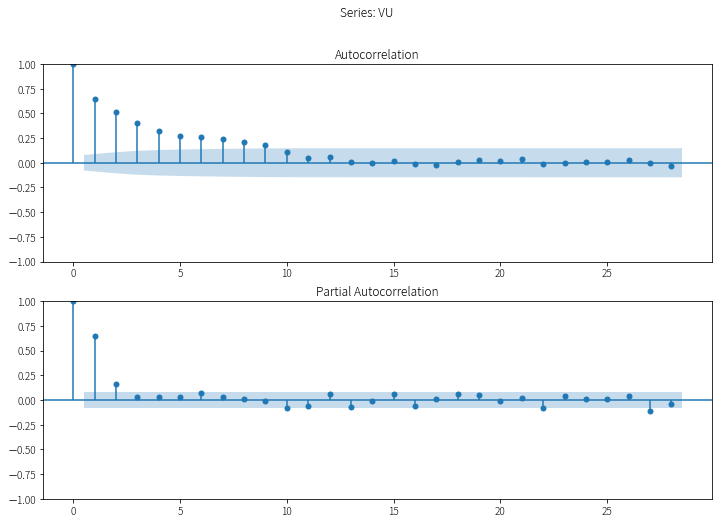

In [25]:
growth_obj.plot_VU_acf()

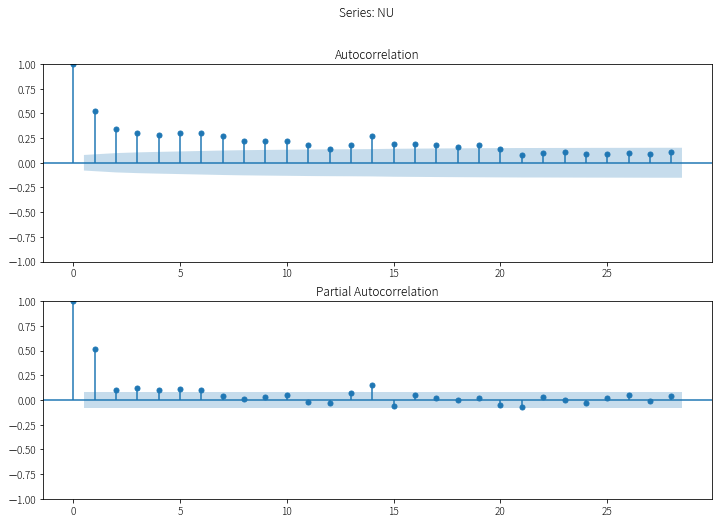

In [26]:
growth_obj.plot_NU_acf()

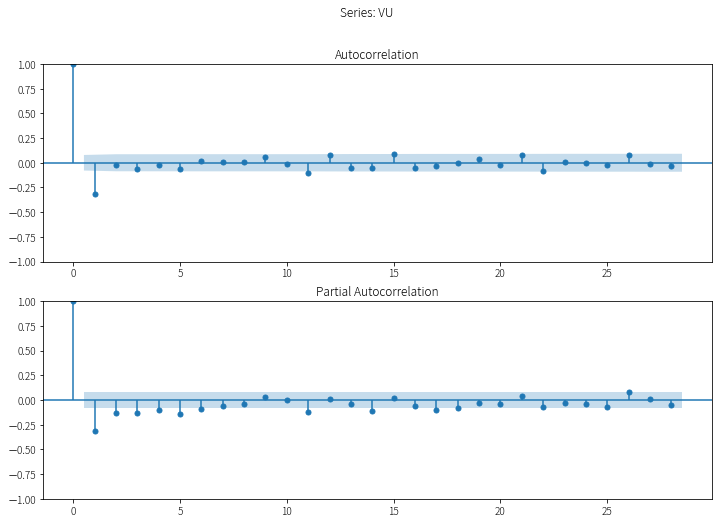

In [27]:
growth_obj.plot_VU_acf(diff=1)

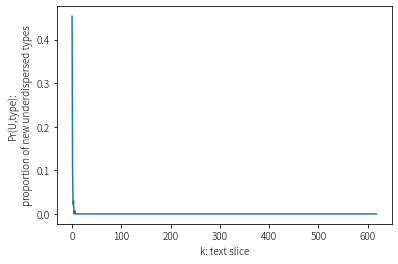

In [28]:
growth_obj.plot_Pr_type()

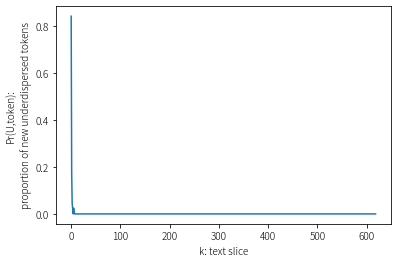

In [29]:
growth_obj.plot_Pr_token()